In [8]:
import os
import sys
parent = os.path.abspath(os.path.join('./', os.pardir))
sys.path.insert(0, parent) # Add parent dirrectory to temporary path for imports
fontPath = os.path.abspath(os.path.join(parent,'UKNumberPlate.ttf'))

from matplotlib import pyplot as plt
from nbp_helper_funs import *

## Explanation

The idea here was that certain letters should be wighted differently based on their shape. Notably letters like I or J were very commonly found in images when doing single-letter matching because they'd match well with the black edges around the numberplate. As opposed to manually coming up with a threshold on the letters as to how they should be weighted, we thought we could get some heuristic on the images of the letters as follows. This ended up not being used, but may help someone in future development.

In [9]:
def letterEntropy(im):
    ''' Calculated the complexity of the letter
        http://uk.mathworks.com/help/images/ref/entropy.html
    '''
    return -np.sum(p*np.log2(p) for p in im.histogram()/np.prod(im.size) if p > 0)

def letterWidthnes(im, threshold=0.5):
    ''' Calculates the average width of the letter as a fraction of the width of the image '''
    return np.mean(np.apply_along_axis( lambda x: np.sum(x<threshold), axis=1, arr=pil2np(im)))/im.width

def letterVerticalStripiness(im, threshold=(0.5, 0.8)):
    ''' Calculates how much of the part of the letter is a vertical straight line '''
    return np.sum(np.apply_along_axis( lambda x: np.sum(x<threshold[0])/im.height, axis=0, arr=pil2np(im))>threshold[1])/im.width

def letterHorizontalStripiness(im, threshold=(0.5, 0.8)):
    ''' Calculates how much of the part of the letter is a horizontal straight line '''
    return np.sum(np.apply_along_axis( lambda x: np.sum(x<threshold[0])/im.width, axis=1, arr=pil2np(im))>threshold[1])/im.height

def letterStripiness(im, threshold=(0.5, 0.8)):
    ''' Calculates how much of the part of the letter is a horizontal straight line '''
    vS = letterVerticalStripiness(im, threshold=threshold)
    hS = letterHorizontalStripiness(im, threshold=threshold)
    if hS == 0  and vS == 0: s = np.nan
    elif vS == 0:            s =  -np.inf
    elif hS == 0:            s = np.inf
    elif vS > hS:            s = vS/hS - 1
    else:                    s = -hS/vS - 1
    return s

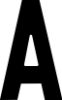

In [31]:
fontPath = os.path.abspath(os.path.join(parent,'UKNumberPlate.ttf'))
getPlate('A',100,fontPath=fontPath)

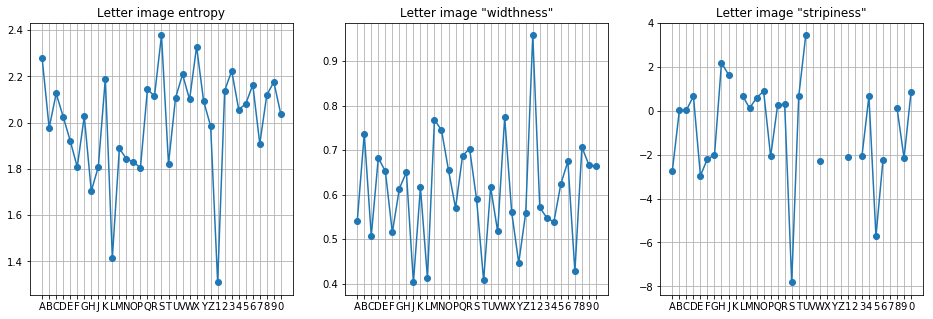

In [27]:
letters = 'ABCDEFGHJKLMNOPQRSTUVWXYZ1234567890'
x = range(len(letters))
gp = lambda x: getPlate(x, 100, fontPath=fontPath) #
f1 = lambda x: letterEntropy(gp(x))
f2 = lambda x: letterWidthnes(gp(x))
f3 = lambda x: letterStripiness(gp(x))

plt.rcParams["figure.figsize"] = (16,5)

plt.subplot(1,3,1)
plt.plot(x,list(f1(letter) for letter in letters),'o-')
plt.title('Letter image entropy')
plt.xticks(x,letters)
plt.grid()

plt.subplot(1,3,2)
plt.plot(x,list(f2(letter) for letter in letters),'o-')
plt.title('Letter image "widthness"')
plt.xticks(x,letters)
plt.grid()

plt.subplot(1,3,3)
plt.plot(x,list(f3(letter) for letter in letters),'o-')
plt.title('Letter image "stripiness"')
plt.xticks(x,letters)
plt.grid()
plt.show()
